In [30]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A Simple Starter Code for the AJL Competition

@Cindy Deng

---


Hi! This starter code is designed to help you get familiar with basic Kaggle operations and guide you through the basic workflow of a machine learning project. 

The code outlines essential steps including data loading, preprocessing, model building, training, and generating predictions. Each section serves as a foundation, but there are many ways to enhance each step to improve your final model's accuracy. Feel free to experiment with different data augmentation techniques, model architectures, and tuning methods to optimize your final results! Some amazing tutorials are available through your AI Studio course in Canvas / in the 'Resource' section of this Kaggle competition.

Good luck and have fun!

---

## Note - About file path

You could use the cell above to print the names of the file directories and get the following directories:

```
/kaggle/input/bttai-ajl-2025/sample_submission.csv
/kaggle/input/bttai-ajl-2025/train.csv
/kaggle/input/bttai-ajl-2025/test.csv
/kaggle/input/bttai-ajl-2025/test/test/e0374ae6c1362ff183cfba28ded5421b.jpg
/kaggle/input/bttai-ajl-2025/test/test/437159c605260bdd079af230566af291.jpg
...
...
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/11271bdf2598afdd4260db3125e1f6a5.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/732819951dcf2b53d15ea7b8bb123b71.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/6dcc7a8abb5e1c6e670101f4b6231246.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/e63c3b3f0ab8905e204fe467cc7411f9.jpg
...
...
```



## 1. Import Necessary Libraries

In [31]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Explanation:
# - pandas and numpy: for data manipulation
# - sklearn: for splitting data and encoding labels
# - tensorflow.keras: for building and training the neural network

## 2. Load Data

Make sure to verify the file paths if you're running on a different platform.

In [32]:
# 2. Load Data
train_df = pd.read_csv('/kaggle/input/bttai-ajl-2025/train.csv')
test_df = pd.read_csv('/kaggle/input/bttai-ajl-2025/test.csv')

# Add .jpg extension to md5hash column to reference the file_name
train_df['md5hash'] = train_df['md5hash'].astype(str)
test_df['md5hash'] = test_df['md5hash'].astype(str)

# Combine label and md5hash to form the correct path
train_df['file_path'] = train_df['label'] + '/' + train_df['md5hash']

# Check the first few rows to understand the structure
print(train_df.head())

## 3. Data Preprocessing


This section demonstrates basic preprocessing techniques. To enhance data quality and model performance, consider incorporating more advanced preprocessing methods.

For further guidance, feel free to take a look at the [Image Preprocessing tutorial](https://colab.research.google.com/drive/1-ItNcRMbZBE6BCwPT-wD8m3YmHqwHxme?usp=sharing)  available in the 'Resources' section of this Kaggle competition.


In [34]:
# 3. Data Preprocessing
# Encode the labels
label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = '/kaggle/input/bttai-ajl-2025/train/train/'

def create_generator(dataframe, directory, batch_size=32, target_size=(256, 256)):
    """
    Template function to create image generators.
    Students should complete this function to load images and labels properly.
    """
    # Fill in the correct flow_from_dataframe parameters
    generator = train_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col='file_path',  # Use combined path
        y_col='encoded_label',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw',
        validate_filenames=False  # Disable strict filename validation
    )
    return generator

# Create generators
train_generator = create_generator(train_data, train_dir)
val_generator = create_generator(val_data, train_dir)

## 4. Build the model


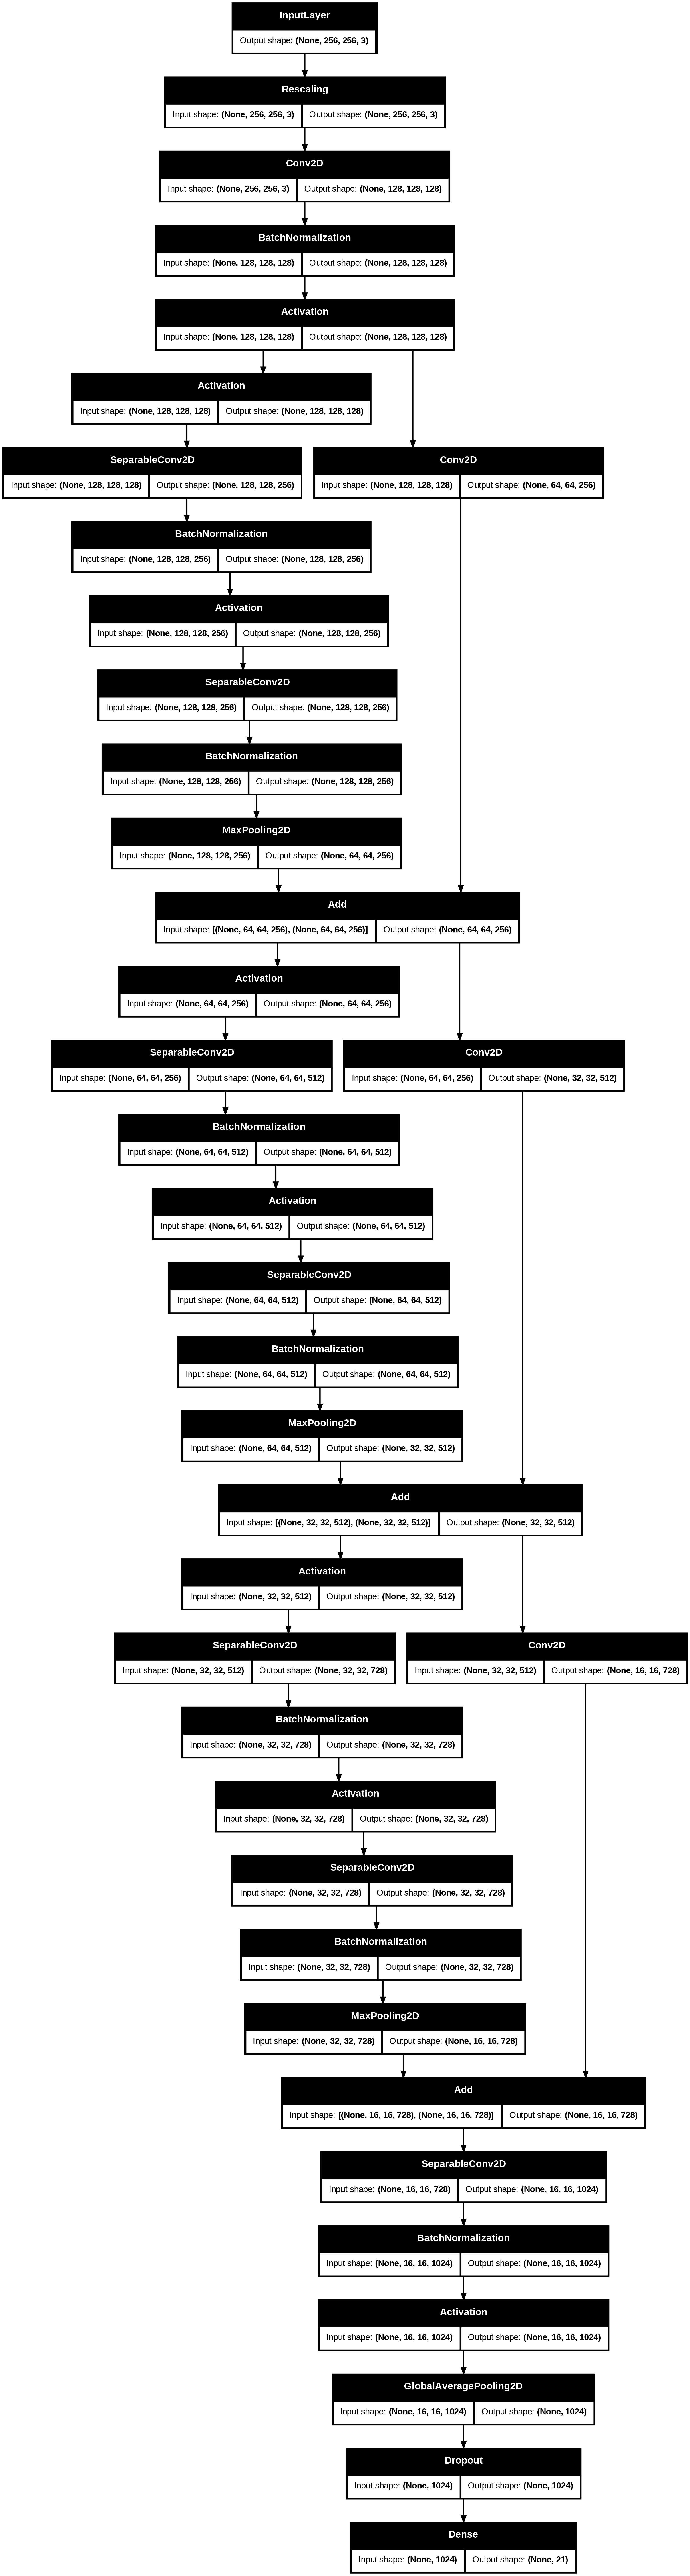

In [38]:
# 4. Build the Model
# TODO: You should implement the model architecture here.
# Feel free to explore different model types that best serve your purpose.
import keras
from keras import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout, Input
from keras.optimizers import Adam
from keras.preprocessing import image


def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Define the input layer with the specified shape.

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    # Rescale pixel values from [0, 255] to [0, 1] by dividing by 255 for normalization.

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    # Apply a convolutional layer with 128 filters, a 3x3 kernel, stride of 2, and "same" padding.
    # This reduces the spatial dimensions of the input image.

    x = layers.BatchNormalization()(x)
    # Normalize the activations from the previous layer to stabilize and accelerate training.

    x = layers.Activation("relu")(x)
    # Apply ReLU (Rectified Linear Unit) activation to introduce non-linearity.

    previous_block_activation = x
    # Save the output of the entry block for residual connections.

    for size in [256, 512, 728]:
        # Loop through a series of blocks with increasing filter sizes (256, 512, 728).

        x = layers.Activation("relu")(x)
        # Apply ReLU activation to the current block's input.

        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        # Apply a depthwise separable convolution with the specified number of filters and 3x3 kernel.

        x = layers.BatchNormalization()(x)
        # Normalize the activations after the convolution.

        x = layers.Activation("relu")(x)
        # Apply ReLU activation again.

        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        # Apply another depthwise separable convolution with the same filter size.

        x = layers.BatchNormalization()(x)
        # Normalize the activations again.

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
        # Apply a 3x3 max pooling layer with a stride of 2 to reduce the spatial dimensions.

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        # Apply a 1x1 convolution to the previous block's output to match dimensions for addition.

        x = layers.add([x, residual])
        # Add the residual connection to the current block's output.

        previous_block_activation = x
        # Update the residual reference for the next block.

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    # Apply a depthwise separable convolution with 1024 filters and 3x3 kernel.

    x = layers.BatchNormalization()(x)
    # Normalize the activations.

    x = layers.Activation("relu")(x)
    # Apply ReLU activation.

    x = layers.GlobalAveragePooling2D()(x)
    # Apply global average pooling to reduce each feature map to a single value.

    if num_classes == 2:
        units = 1
        # If it's a binary classification task, the output layer will have one unit.
    else:
        units = num_classes
        # For multi-class classification, the output layer will have one unit per class.

    x = layers.Dropout(0.25)(x)
    # Apply dropout with a rate of 25% to reduce overfitting.

    # outputs = layers.Dense(units, activation=None)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    # Define the output layer with `units` neurons. No activation is applied here (logits are returned).

    return keras.Model(inputs, outputs)
    # Create and return the Keras model.

# Create the model instance.
num_classes = train_df['encoded_label'].nunique()
model = make_model(input_shape=(256, 256) + (3,), num_classes=num_classes)
# model = make_model(input_shape=(128,128) + (3,), num_classes=2)
# Call `make_model` with input shape (180, 180, 3) (for RGB images) and binary classification (2 classes).

keras.utils.plot_model(model, show_shapes=True)
# Visualize the model's architecture with layer shapes using Keras's plot_model utility.


## 5. Train the Model


In [40]:
# 5. Train the Model
# TODO: Train your model here.
epochs = 12

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    # loss=keras.losses.BinaryCrossentropy(from_logits=True),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    # metrics=[keras.metrics.BinaryAccuracy(name="acc")],
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)
model.fit(
    train_generator,
    # train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_generator,
)

Epoch 1/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1752s 24s/step - acc: 0.0243 - loss: 2.8028 - val_acc: 0.0000e+00 - val_loss: 3.0291
Epoch 2/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1734s 24s/step - acc: 0.0679 - loss: 2.6164 - val_acc: 0.0000e+00 - val_loss: 3.0266
Epoch 3/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1749s 24s/step - acc: 0.0149 - loss: 2.5257 - val_acc: 0.0000e+00 - val_loss: 3.0225
Epoch 4/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1767s 25s/step - acc: 0.0423 - loss: 2.4416 - val_acc: 0.0000e+00 - val_loss: 3.0217
Epoch 5/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1770s 25s/step - acc: 0.0315 - loss: 2.3412 - val_acc: 0.1119 - val_loss: 3.0310
Epoch 6/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1729s 24s/step - acc: 0.0496 - loss: 2.2218 - val_acc: 0.0000e+00 - val_loss: 3.0697
Epoch 7/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1780s 25s/step - acc: 0.0306 - loss: 2.1539 - val_acc: 0.0000e+00 - val_loss: 3.1445
Epoch 8/12
72/72 ━━━━━━━━━━━━━━━━━━━━ 1742s 24s/step - acc: 0.0445 - loss: 2.0316 - val_acc: 0.0000e+00 - val_loss: 3.2499
Epoch 9/12
72/72 ━━━

## 6. Make Predictions on Test Data

In [41]:
# 6. Make Predictions on Test Data
def preprocess_test_data(test_df, directory, batch_size=32, target_size=(256, 256)):
    """
    Template for loading and preprocessing test images.
    """
    # TODO: create a generator for the test set here.
    # test_datagen = ImageDataGenerator(rescale=1./255)
    # test_generator = test_datagen.flow_from_dataframe(
    #     .... ## set the test_generator here 
    # )
    # return test_generator
    test_datagen = ImageDataGenerator(rescale=1./255)
        
    test_generator = test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=directory,
            x_col='md5hash',
            y_col=None,
            target_size=target_size,
            batch_size=batch_size,
            class_mode=None,
            shuffle=False
    )
    return test_generator

# Load test data
test_dir = '/kaggle/input/bttai-ajl-2025/test/test/'
test_generator = preprocess_test_data(test_df, test_dir)

## 7. Generate Predictions

In [43]:
# 7. generate predictions
# TODO
# Generate predictions based on the trained model
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)  # Convert logits to class labels
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Then, save the predictions into a CSV file for submission
submission = pd.DataFrame({
    'md5hash': test_df['md5hash'],
    'label': predicted_labels
})
submission.to_csv('submissionV3.csv', index=False)
print("Submission file created successfully!")

39/39 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step
Submission file created successfully!
